In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

df = pd.read_csv("weight-height.csv")
df

,Cinsiyet,Kilo,Boy
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cinsiyet  10000 non-null  int64  
 1   Kilo      10000 non-null  float64
 2   Boy       10000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


In [71]:
y = df["Kilo"]
X = df["Boy"]
X.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Boy, dtype: float64

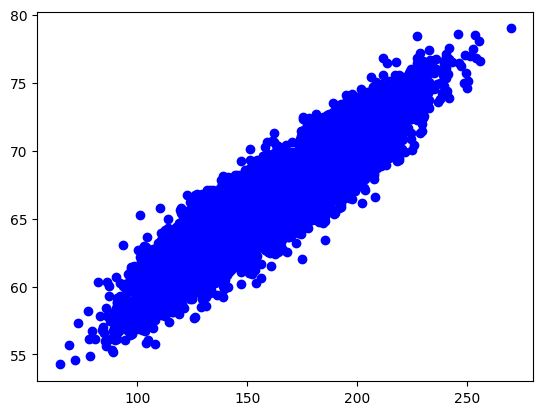

In [72]:
plt.scatter(X, y, c ="blue")
 
# To show the plot
plt.show()

In [73]:
def standardize(X):
    return (X - X.mean())/X.std()

X = standardize(X)


In [74]:
beta0 = np.random.rand()   # 1. Aşama: Parametreleri rastgele başlat
beta1 = np.random.rand()
alpha = 0.00001

In [75]:
def tahmin(X,beta0,beta1):  
    return beta0 + beta1*X

In [76]:
def sse(y,ypred):                 # 2. Aşama: Verilen parametrelerle SSE değerlerini hesaplayın
    return np.sum((y-ypred)**2)

In [77]:
def gradyan(y,ypred,X):              # 3. Aşama: Gradyanları hesapla
    grad_beta0 = np.sum((ypred-y)*1)
    grad_beta1 = np.sum((ypred-y)*X)   
    return grad_beta0,grad_beta1

In [78]:
def parametreleri_güncelle(beta0,beta1,grad_beta0,grad_beta1,alpha): # 4. Aşama: Gradyanı verilen parametreleri güncelle
    beta0_new = beta0 - alpha * grad_beta0
    beta1_new = beta1 - alpha * grad_beta1
    return beta0_new,beta1_new

In [79]:
num_iter = 1000         # 5. Aşama: 2-4 arasındaki adımları bir değere yakınsayana kadar tekrarlayın
SSE_list = []
ypred_list = []
for i in range(num_iter):
    ypred = tahmin(X,beta0,beta1)
    J = sse(y,ypred)
    SSE_list.append(J)
    grad_beta0, grad_beta1 = gradyan(y,ypred,X)
    beta0, beta1 = parametreleri_güncelle(beta0,beta1,grad_beta0,grad_beta1,alpha)
    ypred_list.append(ypred)
SSE_list

[44098675.14546393,
 35724002.054291286,
 28940516.444432586,
 23445892.771572545,
 18995247.33016166,
 15390224.306834701,
 12470155.483150827,
 10104899.59438462,
 8189042.209799809,
 6637197.635389855,
 5380203.454870156,
 4362038.107697258,
 3537324.1271150406,
 2869305.762851098,
 2328210.8554027844,
 1889923.9541295057,
 1534911.5428431616,
 1247351.472484298,
 1014427.8015476003,
 825759.6167923501,
 672938.3779902079,
 549153.1671484923,
 448887.14036286576,
 367671.65380329173,
 301887.105750744,
 248601.61863728252,
 205440.37149069394,
 170479.75920831558,
 142161.66156370242,
 119224.00109786644,
 100644.49500781836,
 85595.09417355547,
 73405.07876771393,
 63531.16569759728,
 55533.295631770365,
 49055.02049042537,
 43807.61731162899,
 39557.22048220948,
 36114.39884415361,
 33325.71315028156,
 31066.87760293397,
 29237.220699978352,
 27755.198519802805,
 26554.76048194588,
 25582.405613029645,
 24794.798122022345,
 24156.83601608557,
 23640.08667931715,
 23221.51969145677

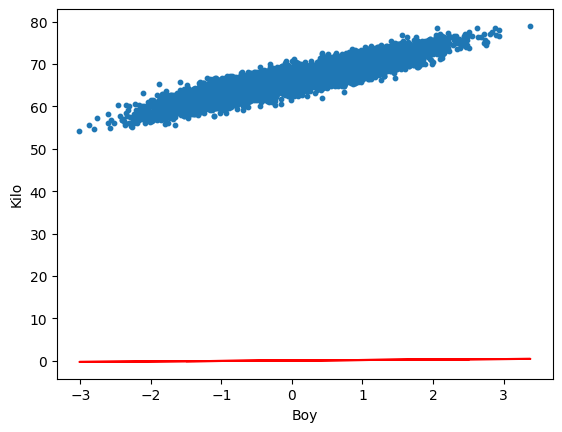

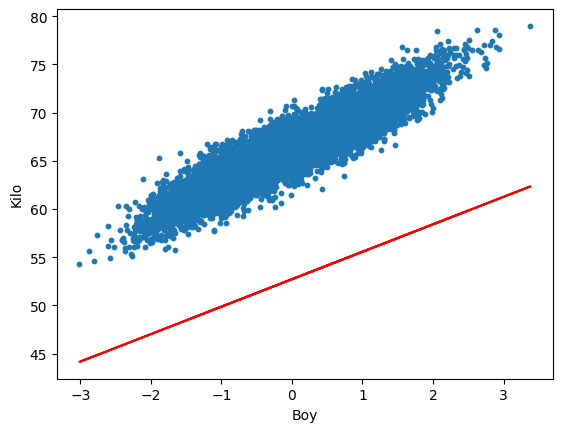

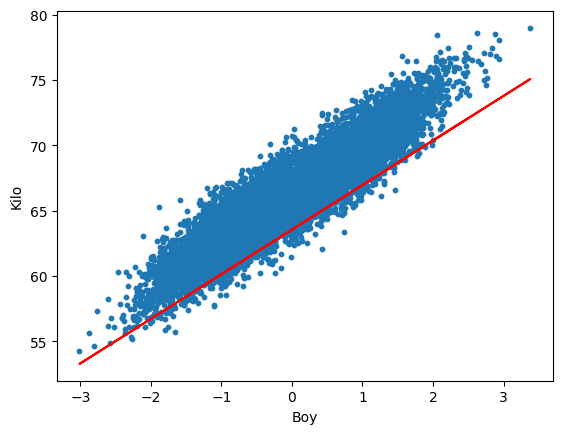

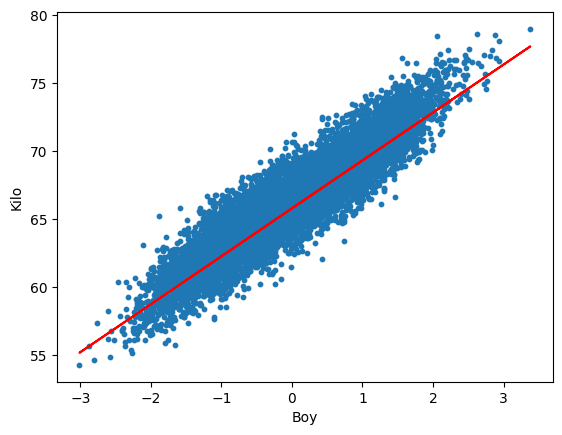

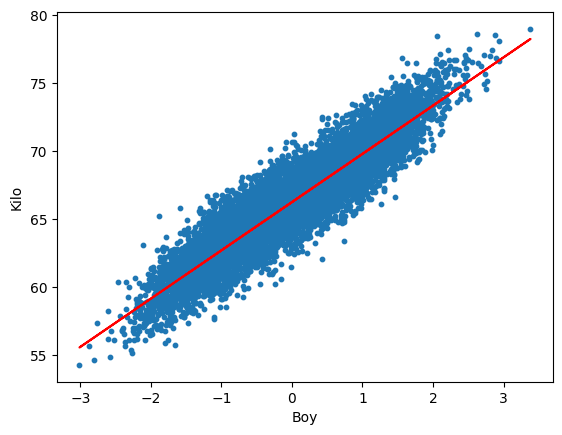

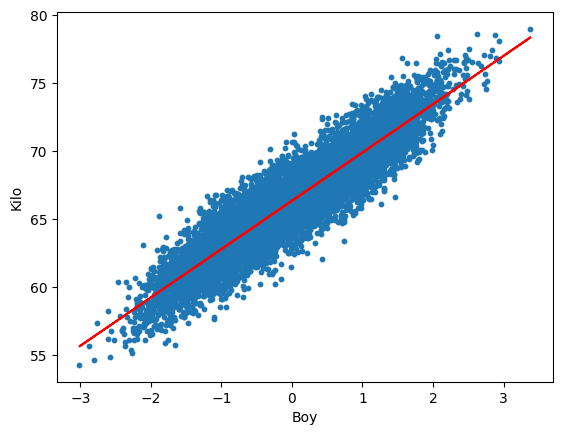

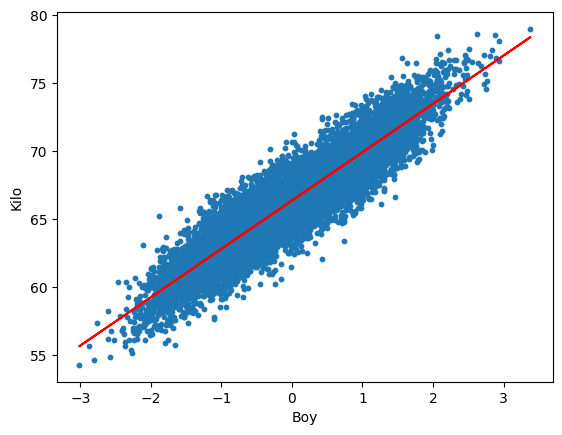

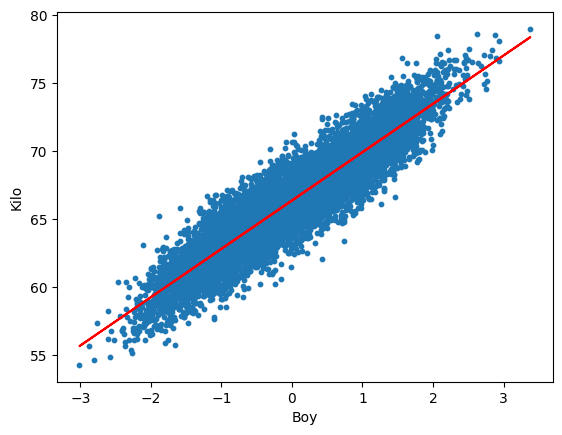

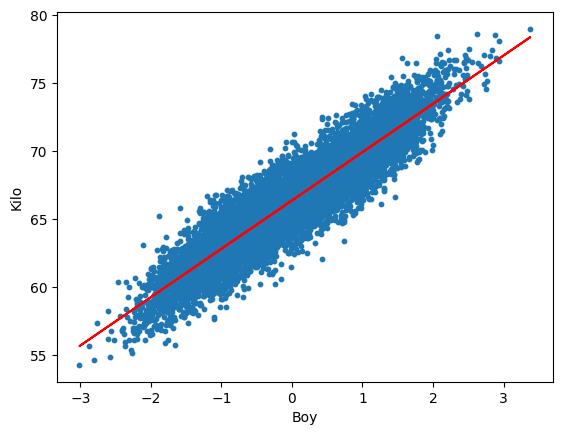

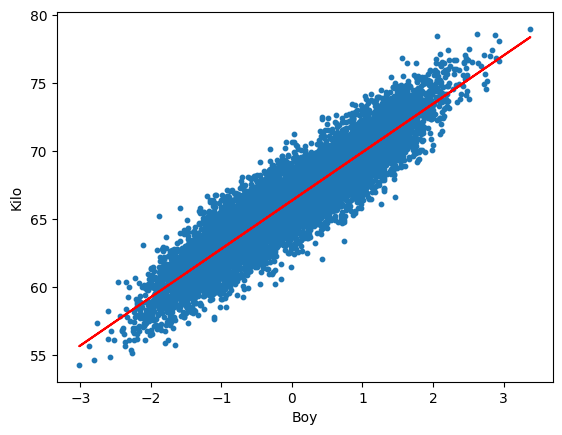

In [80]:
for i in range(10):
    plt.scatter(X, y, s=10)
    plt.plot(X, ypred_list[15*i], color='r')
    plt.xlabel("Boy")
    plt.ylabel("Kilo")
    plt.show()
    

In [81]:
def r2(SSE,SST):
    return 1-(SSE/SST)

In [90]:
SST = (y.std())**2*10000
r2(21437,SST)

0.8551893834584264

In [83]:
# Splitting the data
def splitting(veriseti, oran):
    Eğitim_seti_boyutu = int(len(veriseti) * oran)
    Eğitim_index=np.random.choice(range(0,len(veriseti)),replace=False,size=Eğitim_seti_boyutu)
    Eğitim_seti=veriseti.iloc[Eğitim_index]
    test_seti=veriseti[~veriseti.index.isin(Eğitim_index)]
    return Eğitim_seti, test_seti

In [84]:
Eğitim_seti, test_seti = splitting(df, 0.8)
Eğitim_seti, test_seti

(      Cinsiyet       Kilo         Boy
 2064         1  66.877783  186.880960
 8342         0  63.067595  133.659394
 8126         0  66.566712  138.600080
 114          1  67.261961  164.014428
 9239         0  65.899387  153.530540
 ...        ...        ...         ...
 7799         0  64.683471  135.708088
 6309         0  61.550113  129.754368
 9691         0  61.095789  115.224796
 9006         0  59.667652  114.386865
 1309         1  65.713608  167.828760
 
 [8000 rows x 3 columns],
       Cinsiyet       Kilo         Boy
 0            1  73.847017  241.893563
 2            1  74.110105  212.740856
 5            1  67.253016  152.212156
 18           1  69.640060  185.983958
 19           1  67.936005  182.426648
 ...        ...        ...         ...
 9984         0  59.047029  111.707369
 9985         0  68.041065  170.514213
 9987         0  65.610243  151.169475
 9997         0  63.867992  128.475319
 9999         0  61.944246  113.649103
 
 [2000 rows x 3 columns])

In [85]:
beta0 = np.random.rand()  
beta1 = np.random.rand()
alpha = 0.00001

In [86]:
x_eğitim = Eğitim_seti["Boy"]
x_test = test_seti["Boy"]

y_eğitim = Eğitim_seti["Kilo"]
y_test = test_seti["Kilo"]

In [87]:
X = standardize(x_eğitim)
num_iter = 1000        # 5. Aşama: 2-4 arasındaki adımları bir değere yakınsayana kadar tekrarlayın
SSE_list = []
for i in range(num_iter):
    ypred = tahmin(X,beta0,beta1)
    J = sse(y_eğitim,ypred)
    SSE_list.append(J)
    grad_beta0, grad_beta1 = gradyan(y,ypred,X)
    beta0, beta1 = parametreleri_güncelle(beta0,beta1,grad_beta0,grad_beta1,alpha)
SSE_list

[34380560.418402,
 29102354.289607834,
 24634880.38247419,
 20853610.264570937,
 17653143.06503483,
 14944267.481981194,
 12651475.065443909,
 10710855.459942855,
 9068314.937697448,
 7678068.565057736,
 6501363.972103192,
 5505401.1511732,
 4662418.17429423,
 3948917.3443686636,
 3345010.209505897,
 2833863.183122442,
 2401228.316769481,
 2035046.1462328038,
 1725109.5404537572,
 1462779.1832406751,
 1240742.756976515,
 1052811.1156980633,
 893745.7659809163,
 759112.8467527033,
 645159.5378003521,
 548709.4519250403,
 467074.094857386,
 397977.92492564954,
 339494.9235554913,
 289994.90853808925,
 248098.09357783396,
 212636.62749143358,
 182622.04098428984,
 157217.6936005428,
 135715.45282034,
 117515.95524670187,
 102111.89967319155,
 89073.90633562928,
 78038.54818210274,
 68698.22053935856,
 60792.56679797697,
 54101.22111191382,
 48437.665819063186,
 43644.03236174144,
 39586.70078555192,
 36152.57515501975,
 33245.93106521966,
 30785.747375471692,
 28703.44778862245,
 26940.98

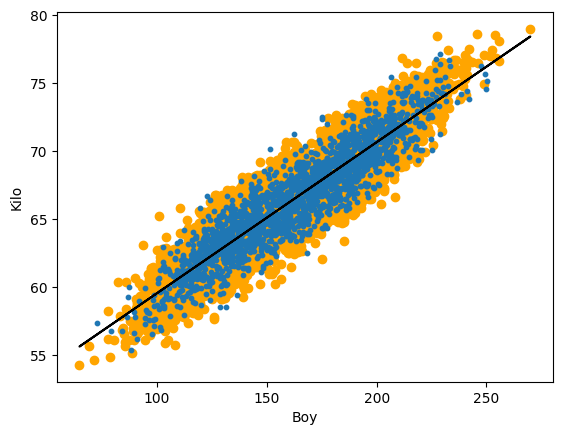

In [88]:
plt.scatter(x_eğitim, y_eğitim, color ="orange")
plt.scatter(x_test, y_test, s=10)
plt.plot(x_eğitim, ypred, color='black')
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.show()

In [89]:
x_test = standardize(x_test)
tahminler = [] 
for i in x_test:
    tahminler.append(tahmin(i,beta0,beta1))
tahminler = pd.DataFrame(tahminler,columns =['yşapka'])
tahminler = tahminler.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
sonuçlar = pd.concat([tahminler, y_test], axis=1)
sonuçlar

,yşapka,Kilo
0,75.359720,73.847017
1,72.066518,74.110105
2,65.228963,67.253016
3,69.043956,69.640060
4,68.642108,67.936005
...,...,...
1995,60.653386,59.047029
1996,67.296434,68.041065
1997,65.111178,65.610243
1998,62.547559,63.867992
